In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from fastai.callbacks.hooks import *

In [ ]:
path = Path('/content/drive/My Drive/Umes2020/')
path_img = path/'JPEGImages'
path_lbl = path/'SegmentationClassPNG'
test_file = path/'testsets'
codes = np.loadtxt(path/'codes2.txt', dtype =str)

In [ ]:
fnames = get_image_files(path_img)
lbl_names = get_image_files(path_lbl)
test_img = get_image_files(test_file)

**Modeling**

In [ ]:
get_y_fn = lambda x: path_lbl/f'{x.stem}.png'

data = (SegmentationItemList.from_folder(path_img)
        .split_by_rand_pct()
        .label_from_func(get_y_fn,classes=codes) 
        .transform(get_transforms(),size=128,tfm_y=True)
        .databunch(bs=4))

#          .normalize(imagenet_stats))

In [ ]:
data.add_test(test_img, tfms=None, tfm_y=False)
data

ImageDataBunch;

Train: LabelList (160 items)
x: SegmentationItemList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: SegmentationLabelList
ImageSegment (1, 128, 128),ImageSegment (1, 128, 128),ImageSegment (1, 128, 128),ImageSegment (1, 128, 128),ImageSegment (1, 128, 128)
Path: /content/drive/My Drive/Umes2020/JPEGImages;

Valid: LabelList (40 items)
x: SegmentationItemList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: SegmentationLabelList
ImageSegment (1, 128, 128),ImageSegment (1, 128, 128),ImageSegment (1, 128, 128),ImageSegment (1, 128, 128),ImageSegment (1, 128, 128)
Path: /content/drive/My Drive/Umes2020/JPEGImages;

Test: LabelList (20 items)
x: SegmentationItemList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: EmptyLabelList
,,,,
Path: /content/drive/My Drive/Umes2020/JPEGImages

In [ ]:
def custom_loss(y_hat,y):
    y = y.squeeze(1)
    loss = nn.CrossEntropyLoss(ignore_index=255)
    return loss(y_hat,y)

In [ ]:
def custom_acc(input,targs):
    targs = targs.squeeze(dim=1)
    input = input.argmax(dim=1)
    
    return (input.flatten()==targs.flatten()).float().mean()


In [ ]:
learn = unet_learner(data,models.resnet34,metrics=custom_acc,loss_func=custom_loss)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


## **Training**

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


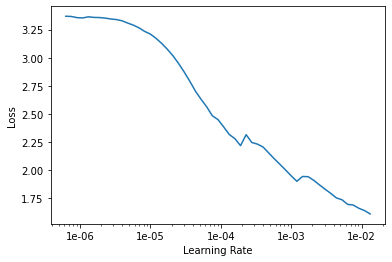

In [ ]:
lr_find(learn)
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(10,slice(1e-3))

epoch,train_loss,valid_loss,custom_acc,time
0,0.622758,0.153958,0.947522,03:05
1,0.313062,0.106463,0.966241,03:09
2,0.193650,0.060474,0.976981,03:07
3,0.147040,0.107288,0.966875,03:10
4,0.116691,0.084721,0.967915,03:15
5,0.096446,0.052172,0.980370,03:09
6,0.077977,0.058769,0.978680,03:12
7,0.064098,0.045676,0.981682,03:11
8,0.055580,0.044934,0.982234,03:18
9,0.048679,0.045593,0.982277,03:16


In [ ]:

learn.path= Path('/content/drive/My Drive/saved_models3')
data.export('data.pkl')
learn.save('red')

In [ ]:
learn = unet_learner(data, models.resnet34)
learn.path= Path('/content/drive/My Drive/saved_models3')
learn = learn.load('red')

In [ ]:
learn.summary()

DynamicUnet
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 64, 64]         9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 64, 64]         128        True      
______________________________________________________________________
ReLU                 [64, 64, 64]         0          False     
______________________________________________________________________
MaxPool2d            [64, 32, 32]         0          False     
______________________________________________________________________
Conv2d               [64, 32, 32]         36,864     False     
______________________________________________________________________
BatchNorm2d          [64, 32, 32]         128        True      
______________________________________________________________________
ReLU                 [64, 32, 32]         0          False     
__________________________________________________

## **Testing**

In [ ]:
test_pred = learn.get_preds(ds_type=DatasetType.Test)
test_pred[0].shape

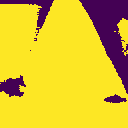

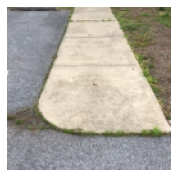

In [ ]:
img = learn.data.test_ds[0][0]
img.show()
y=learn.predict(img)
y[0]

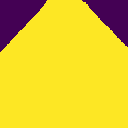

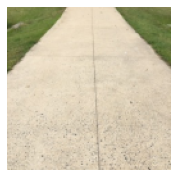

In [ ]:
img = learn.data.test_ds[1][0]
img.show()
y=learn.predict(img)
y[0]

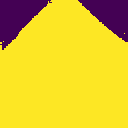

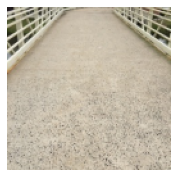

In [ ]:
img = learn.data.test_ds[2][0]
img.show()
y=learn.predict(img)
y[0]


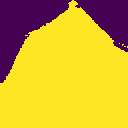

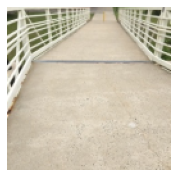

In [ ]:
img = learn.data.test_ds[3][0]
img.show()
y=learn.predict(img)
y[0]

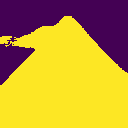

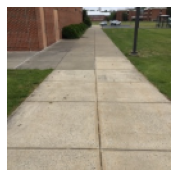

In [ ]:
img = learn.data.test_ds[4][0]
img.show()
y=learn.predict(img)
y[0]

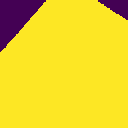

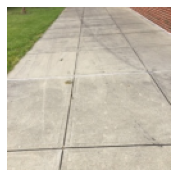

In [ ]:
img = learn.data.test_ds[5][0]
img.show()
y=learn.predict(img)
y[0]

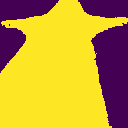

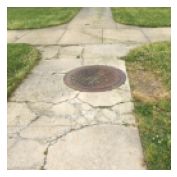

In [ ]:
img = learn.data.test_ds[6][0]
img.show()
y=learn.predict(img)
y[0]

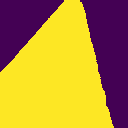

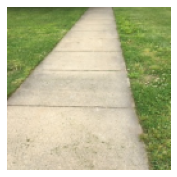

In [ ]:
img = learn.data.test_ds[7][0]
img.show()
y=learn.predict(img)
y[0]

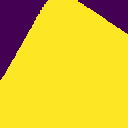

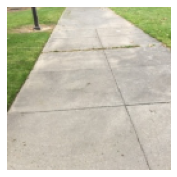

In [ ]:
img = learn.data.test_ds[8][0]
img.show()
y=learn.predict(img)
y[0]

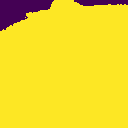

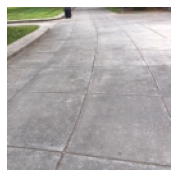

In [ ]:
img = learn.data.test_ds[9][0]
img.show()
y=learn.predict(img)
y[0]

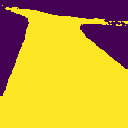

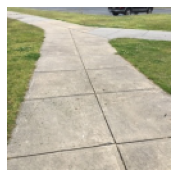

In [ ]:
img = learn.data.test_ds[10][0]
img.show()
y=learn.predict(img)
y[0]

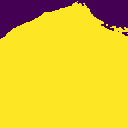

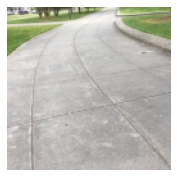

In [ ]:
img = learn.data.test_ds[11][0]
img.show()
y=learn.predict(img)
y[0]

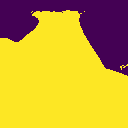

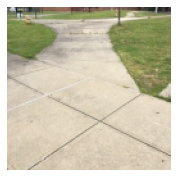

In [ ]:
img = learn.data.test_ds[12][0]
img.show()
y=learn.predict(img)
y[0]

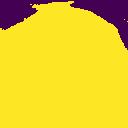

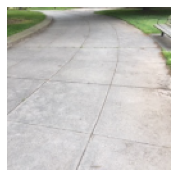

In [ ]:
img = learn.data.test_ds[13][0]
img.show()
y=learn.predict(img)
y[0]

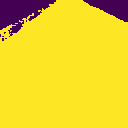

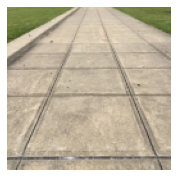

In [ ]:
img = learn.data.test_ds[14][0]
img.show()
y=learn.predict(img)
y[0]

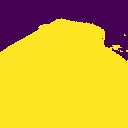

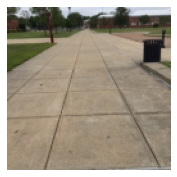

In [ ]:
img = learn.data.test_ds[15][0]
img.show()
y=learn.predict(img)
y[0]

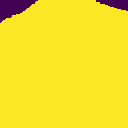

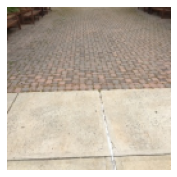

In [ ]:
img = learn.data.test_ds[16][0]
img.show()
y=learn.predict(img)
y[0]

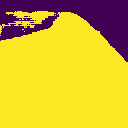

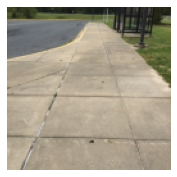

In [ ]:
img = learn.data.test_ds[17][0]
img.show()
y=learn.predict(img)
y[0]

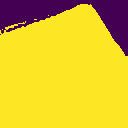

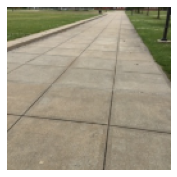

In [ ]:
img = learn.data.test_ds[18][0]
img.show()
y=learn.predict(img)
y[0]

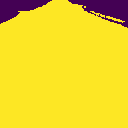

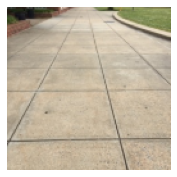

In [ ]:
img = learn.data.test_ds[19][0]
img.show()
y=learn.predict(img)
y[0]